<a href="https://colab.research.google.com/github/anggisotomani/Sentiment-Analysis/blob/main/Ride_Hailing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Install Packages and Import Library**

In [1]:
# Install packages
!pip install sastrawi
!pip install gensim
!pip install nltk
!pip install wordcloud
!pip install tensorflow
!pip install scikit-learn
!pip install seaborn
!pip install matplotlib
!pip install pandas
!pip install numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 562.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 9.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scipy>=1.14.0; python_ve

In [1]:
# Import libraries
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
seed = 0
np.random.seed(seed)
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import requests
import datetime as dt
import re
import string
import ipywidgets as widgets
from io import StringIO
from IPython.display import display
from sklearn.metrics import accuracy_score

# NLP libraries
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from wordcloud import WordCloud
from gensim.models import Word2Vec
import gensim
from sklearn.feature_extraction.text import TfidfVectorizer

# ML libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from scipy import sparse

# Deep learning libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dropout, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# **Loading Dataset**

In [2]:
# Download dataset dari GitHub
!wget -O dataset.csv "https://raw.githubusercontent.com/anggisotomani/Dataset/refs/heads/main/Dataset_OjekOnline_Apps%20(1).csv"

--2025-05-29 08:09:14--  https://raw.githubusercontent.com/anggisotomani/Dataset/refs/heads/main/Dataset_OjekOnline_Apps%20(1).csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19690190 (19M) [text/plain]
Saving to: ‘dataset.csv’

dataset.csv         100%[===================>]  18.78M  99.8MB/s    in 0.2s    

2025-05-29 08:09:14 (99.8 MB/s) - ‘dataset.csv’ saved [19690190/19690190]



In [3]:
df = pd.read_csv('/content/dataset.csv')
df

userName  score                   at  \
0                  Pengguna Google      5  2024-12-20 12:57:42   
1                  Pengguna Google      1  2024-12-20 12:55:01   
2                  Pengguna Google      5  2024-12-20 12:45:41   
3                  Pengguna Google      1  2024-12-20 12:42:27   
4                  Pengguna Google      1  2024-12-20 12:35:55   
...                            ...    ...                  ...   
199995             sutrisno trisno      5  2024-07-15 07:47:19   
199996              Novita Lalenoh      1  2024-07-15 07:43:01   
199997               herleni pohan      5  2024-07-15 07:39:59   
199998                   Zuhri Oke      5  2024-07-15 07:32:30   
199999  Kurnia Agung Maulana Yamin      1  2024-07-15 07:31:54   

                                                  content  appName  
0                                                   keren  inDrive  
1                       Aplikasi jelek buruk banget...👎👎👎  inDrive  
2                                                    good  inDrive  
3       Aplikasi penjahat , Maling uang driver , sy se...  inDrive  
4       Hey dev, udah mah aplikasi tidak kompatibel di...  inDrive  
...                                                   ...      ...  
199995                                                 ok    Maxim  
199996  Maxim sekarang bisa tiba2 mark up harga yah :(...    Maxim  
199997                                              mantp    Maxim  
199998               Cepat dan Ramai, Driver maxim Handal    Maxim  
199999           Aplikasi tolol, minta OTP aja susah bodo    Maxim  

[200000 rows x 5 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   userName  200000 non-null  object
 1   score     200000 non-null  int64 
 2   at        200000 non-null  object
 3   content   199998 non-null  object
 4   appName   200000 non-null  object
dtypes: int64(1), object(4)
memory usage: 7.6+ MB


# **Preprocessing Text**

In [5]:
clean_df = df.dropna()

In [6]:
clean_df = clean_df.drop_duplicates()
jumlah_ulasan_setelah_hapus_duplikat, jumlah_kolom_setelah_hapus_duplikat = clean_df.shape

In [7]:
clean_df.drop(['userName', 'score', 'at'], axis=1, inplace=True)

In [8]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199998 entries, 0 to 199999
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   content  199998 non-null  object
 1   appName  199998 non-null  object
dtypes: object(2)
memory usage: 4.6+ MB


In [9]:
#Cleaning
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # menghapus mention
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # menghapus hashtag
    text = re.sub(r'RT[\s]', '', text) # menghapus RT
    text = re.sub(r"http\S+", '', text) # menghapus link
    text = re.sub(r'[0-9]+', '', text) # menghapus angka
    text = re.sub(r'[^\w\s]', '', text) # menghapus karakter selain huruf dan angka
    text = re.sub(r'[^\x00-\x7F]+', '', text) # menghapus karakter non-ASCII (termasuk emoji)
    text = text.replace('\n', ' ') # mengganti baris baru dengan spasi
    text = text.strip(' ') # menghapus karakter spasi dari kiri dan kanan teks
    return text

#Casefolding
def casefoldingText(text): # Mengubah semua karakter dalam teks menjadi huruf kecil
    text = text.lower()
    return text

#Normalization
# Menghapus kata-kata Slang
slangwords = {
    "@": "di",
    "abis": "habis",
    "apk": "aplikasi",
    "app": "aplikasi",
    "dapet": "dapat",
    "wtb": "beli",
    "nda": "tidak",
    "gx": "tidak",
    "cs": "pelanggan",
    "masi": "masih",
    "wts": "jual",
    "wtt": "tukar",
    "bgt": "banget",
    "bagu": "bagus",
    "bgus": "bagus",
    "ok": "oke",
    "gw": "saya",
    "maks": "maksimal",
    "mantab": "mantap",
    "indriver": "indrive",
    "gk": "tidak",
    "sy": "saya",
    "udah": "sudah",
    "sdh": "sudah",
    "cs": "teman",
    "bener": "benar",
    "parah": "buruk",
    "rb": "ribu",
    "tp": "tapi",
    "tpi": "tapi",
    "deket": "dekat",
    "order": "pesanan",
    "cuman": "cuma",
    "mulu": "selalu",
    "ni": "ini",
    "jelek": "buruk",
    "jd": "jadi",
    "lg": "lagi",
    "menyalaa": "menyala",
    "drivernya": "driver",
    "sistemnya": "sistem",
    "pengemudi": "driver",
    "titik": "alamat",
    "ongkos": "biaya",
    "potongan": "diskon",
    "tdk": "tidak",
    "min": "anda",
    "nggak": "tidak",
    "soppe": "shopee",
    "ga": "tidak",
    "pesen": "pesan",
    "sampe": "sampai",
    "pake": "pakai",
    "cepet": "cepat",
    "nih": "ini",
    "jgn": "jangan",
    "map": "peta",
    "klo": "kalau",
    "eror": "error",
    "dpt": "dapat",
    "jg": "juga",
    "bagussssssssss": "bagus",
    "ngga": "tidak",
    "mod": "modifikasi",
    "trus": "terus",
    "batalin": "batal",
    "maling": "pencuri",
    "jelasss": "jelas",
    "ngeselin": "menyebalkan",
    "dev": "developer",
    "mah": "saja",
    "pdhl": "padahal",
    "maps": "peta",
    "udh": "sudah",
    "blm": "belum",
    "mantul": "mantap",
    "bln": "bulan",
    "notif": "notifikasi",
    "g": "tidak",
    "priorita": "prioritas",
    "ancur": "hancur",
    "jdi": "jadi",
    "karna": "karena",
    "mantappp": "mantap",
    "grap": "grab",
    "trimakasih": "terimakasih",
    "supirnya": "driver",
    "mantapp": "mantap",
    "cpt": "cepat",
    "gampang": "mudah",
    "kek": "seperti",
    "org": "orang",
    "mantaf": "mantap",
    "dlm": "dalam",
    "kerenn":"keren",
    "mambatu": "membantu",
    "mmbantu": "membantu",
    "mantapppp": "mantap",
    "mantp": "mantap",
    "mantappa": "mantap",
    "mntap": "mantap",
    "mantaap": "mantap",
    "tolol": "bodoh",
    "baikk": "baik",
    "greb": "grab",
    "sngt": "sangat",
    "sngat": "sangat",
    "bangat": "banget"
}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

#Tokenizing
def tokenizingText(text): # Memecah atau membagi string, teks menjadi daftar token
    text = word_tokenize(text)
    return text

#Stopwords Removal
def filteringText(text): # Menghapus stopwords dalam teks
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','nya','na', 'b', 'pa', 'dri', 'ny', 'dr', 'utk', 'deh', 'sih', 'ku','di', "ya", "yg", "loh","kah", "si", "sih", "dgn", "X", "woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def toSentence(list_words): # Mengubah daftar kata menjadi kalimat
    sentence = ' '.join(word for word in list_words)
    return sentence

In [10]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
clean_df['text_final'] = clean_df['text_stopword'].apply(toSentence)

# Tampilkan
clean_df.head(10)

content  appName  \
0                                              keren  inDrive   
1                  Aplikasi jelek buruk banget...👎👎👎  inDrive   
2                                               good  inDrive   
3  Aplikasi penjahat , Maling uang driver , sy se...  inDrive   
4  Hey dev, udah mah aplikasi tidak kompatibel di...  inDrive   
5  Makin kesini drivernya makin ngeselin ga mau t...  inDrive   
6  Sangat bagussssssssss sistemnya sangat wouwww ...  inDrive   
7  pertama kali pakai indrive, dapet pengemudi ga...  inDrive   
8                                  Kenapa jadi sepi?  inDrive   
9  Hallo. Kenapa gak bisa updet indiver dari play...  inDrive   

                                          text_clean  \
0                                              keren   
1                        Aplikasi jelek buruk banget   
2                                               good   
3  Aplikasi penjahat  Maling uang driver  sy seor...   
4  Hey dev udah mah aplikasi tidak kompatibel di ...   
5  Makin kesini drivernya makin ngeselin ga mau t...   
6  Sangat bagussssssssss sistemnya sangat wouwww ...   
7  pertama kali pakai indrive dapet pengemudi gak...   
8                                   Kenapa jadi sepi   
9  Hallo Kenapa gak bisa updet indiver dari plays...   

                                text_casefoldingText  \
0                                              keren   
1                        aplikasi jelek buruk banget   
2                                               good   
3  aplikasi penjahat  maling uang driver  sy seor...   
4  hey dev udah mah aplikasi tidak kompatibel di ...   
5  makin kesini drivernya makin ngeselin ga mau t...   
6  sangat bagussssssssss sistemnya sangat wouwww ...   
7  pertama kali pakai indrive dapet pengemudi gak...   
8                                   kenapa jadi sepi   
9  hallo kenapa gak bisa updet indiver dari plays...   

                                     text_slangwords  \
0                                              keren   
1                        aplikasi buruk buruk banget   
2                                               good   
3  aplikasi penjahat pencuri uang driver saya seo...   
4  hey developer sudah saja aplikasi tidak kompat...   
5  makin kesini driver makin menyebalkan tidak ma...   
6  sangat bagus sistem sangat wouwww tambah satu ...   
7  pertama kali pakai indrive dapat driver gak je...   
8                                   kenapa jadi sepi   
9  hallo kenapa gak bisa updet indiver dari plays...   

                                 text_tokenizingText  \
0                                            [keren]   
1                   [aplikasi, buruk, buruk, banget]   
2                                             [good]   
3  [aplikasi, penjahat, pencuri, uang, driver, sa...   
4  [hey, developer, sudah, saja, aplikasi, tidak,...   
5  [makin, kesini, driver, makin, menyebalkan, ti...   
6  [sangat, bagus, sistem, sangat, wouwww, tambah...   
7  [pertama, kali, pakai, indrive, dapat, driver,...   
8                               [kenapa, jadi, sepi]   
9  [hallo, kenapa, gak, bisa, updet, indiver, dar...   

                                       text_stopword  \
0                                            [keren]   
1                   [aplikasi, buruk, buruk, banget]   
2                                             [good]   
3  [aplikasi, penjahat, pencuri, uang, driver, dr...   
4  [hey, developer, aplikasi, kompatibel, perangk...   
5      [kesini, driver, menyebalkan, tarif, tertera]   
6  [bagus, sistem, wouwww, bintang, lihat, sistem...   
7  [kali, pakai, indrive, driver, gak, gak, ramah...   
8                                             [sepi]   
9             [hallo, gak, updet, indiver, playstor]   

                                          text_final  
0                                              keren  
1                        aplikasi buruk buruk banget  
2                                               good  
3  aplikasi penjahat pen

# **Labeling**

In [11]:
# Membuat dictionary kosong untuk menyimpan kata-kata positif beserta nilai intensitasnya
lexicon_positive = dict()

# Mengambil data lexicon positif dari URL
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')

# Mengecek apakah permintaan HTTP berhasil (status code 200)
if response.status_code == 200:
    # Membaca data CSV dari respons teks menggunakan csv.reader
    reader = csv.reader(StringIO(response.text), delimiter=',')

    # Memasukkan setiap baris data ke dalam dictionary lexicon_positive
    for row in reader:
        lexicon_positive[row[0]] = int(row[1])  # row[0]: kata, row[1]: nilai intensitas
else:
    # Menampilkan pesan kesalahan jika gagal mengambil data
    print("Failed to fetch positive lexicon data")

# Membuat dictionary kosong untuk menyimpan kata-kata negatif beserta nilai intensitasnya
lexicon_negative = dict()

# Mengambil data lexicon negatif dari URL
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')

# Mengecek apakah permintaan HTTP berhasil (status code 200)
if response.status_code == 200:
    # Membaca data CSV dari respons teks menggunakan csv.reader
    reader = csv.reader(StringIO(response.text), delimiter=',')

    # Memasukkan setiap baris data ke dalam dictionary lexicon_negative
    for row in reader:
        lexicon_negative[row[0]] = int(row[1])  # row[0]: kata, row[1]: nilai intensitas
else:
    # Menampilkan pesan kesalahan jika gagal mengambil data
    print("Failed to fetch negative lexicon data")

In [12]:
def sentiment_analysis_lexicon_indonesia(text):
    # Inisialisasi variabel skor untuk menghitung nilai sentimen
    score = 0

    # Menghitung skor berdasarkan lexicon positif
    for word in text:  # Iterasi setiap kata dalam teks
        if word in lexicon_positive:  # Jika kata ada dalam lexicon positif
            score = score + lexicon_positive[word]  # Tambahkan nilai kata ke skor

    # Menghitung skor berdasarkan lexicon negatif
    for word in text:  # Iterasi setiap kata dalam teks
        if word in lexicon_negative:  # Jika kata ada dalam lexicon negatif
            score = score + lexicon_negative[word]  # Tambahkan nilai kata ke skor (negatif)

    # Menentukan polaritas berdasarkan skor akhir
    polarity = ''  # Inisialisasi variabel polaritas sebagai string kosong
    if score > 0:
        polarity = 'positive'
    elif score < 0:
        polarity = 'negative'
    else:
        polarity = 'neutral'

    return score, polarity

In [13]:
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
print(clean_df['polarity'].value_counts())

polarity
positive    93231
negative    56926
neutral     49841
Name: count, dtype: int64


# **DATA SPLIT DAN EKSTRAKSI FITUR MENGGUNAKAN Word2Vec DAN TF-IDF**

# **Penggabungan TF-IDF dan Word2vec**

# **TF-IDF dan Word2vec**

In [14]:
# Data preparation
X = clean_df['text_final']
y = clean_df['polarity'].apply(lambda x: 1 if x == 'positive' else (0 if x == 'neutral' else -1))

In [15]:
# TF-IDF Feature Extraction
tfidf = TfidfVectorizer(max_features=1300, min_df=17, max_df=0.8)
X_tfidf = tfidf.fit_transform(X)

# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Tampilkan
features_df.head()

aamiin  abal  abang  abangnya  abg   ac  acc   ad  adain  adakan  ...  \
0     0.0   0.0    0.0       0.0  0.0  0.0  0.0  0.0    0.0     0.0  ...   
1     0.0   0.0    0.0       0.0  0.0  0.0  0.0  0.0    0.0     0.0  ...   
2     0.0   0.0    0.0       0.0  0.0  0.0  0.0  0.0    0.0     0.0  ...   
3     0.0   0.0    0.0       0.0  0.0  0.0  0.0  0.0    0.0     0.0  ...   
4     0.0   0.0    0.0       0.0  0.0  0.0  0.0  0.0    0.0     0.0  ...   

   warna  wifi  wilayah  wktu  wkwk  wow  yaaa  yah  yng  zona  
0    0.0   0.0      0.0   0.0   0.0  0.0   0.0  0.0  0.0   0.0  
1    0.0   0.0      0.0   0.0   0.0  0.0   0.0  0.0  0.0   0.0  
2    0.0   0.0      0.0   0.0   0.0  0.0   0.0  0.0  0.0   0.0  
3    0.0   0.0      0.0   0.0   0.0  0.0   0.0  0.0  0.0   0.0  
4    0.0   0.0      0.0   0.0   0.0  0.0   0.0  0.0  0.0   0.0  

[5 rows x 1300 columns]

In [16]:
# Tampilkan vocabulary dalam format terstruktur
print("Vocabulary:")
for word, index in tfidf.vocabulary_.items():
    print(f"{word}: {index}")

Vocabulary:
keren: 532
aplikasi: 53
buruk: 199
banget: 93
good: 385
pencuri: 915
uang: 1257
driver: 313
kali: 486
saldo: 1049
indrive: 437
hilang: 422
gara: 362
akun: 23
hp: 425
error: 331
verifikasi: 1278
data: 240
sim: 1102
ktp: 580
berhasil: 134
lgsg: 614
login: 625
nomer: 820
liat: 616
email: 324
respon: 1024
developer: 246
mesen: 741
nyuruh: 843
dibatalin: 257
dikasih: 272
bintang: 168
please: 980
cari: 212
pribadi: 991
tetep: 1204
update: 1269
skrg: 1114
lu: 629
gimana: 370
kecewa: 509
kesini: 539
menyebalkan: 727
tarif: 1169
tertera: 1201
bagus: 79
sistem: 1108
lihat: 617
perbaikan: 941
pakai: 879
gak: 354
ramah: 1008
sopan: 1131
diluar: 276
penumpang: 936
nyaman: 834
terpaksa: 1197
uninstal: 1266
sepi: 1085
hallo: 405
mantap: 656
pengaduan: 918
oke: 851
original: 870
kena: 524
notifikasi: 827
cocol: 224
autobid: 72
berfungsi: 130
capek: 210
naikin: 784
pertahankan: 956
rating: 1012
mlh: 756
suruh: 1151
nyocol: 842
orderan: 866
argo: 61
diskon: 289
kepotong: 530
alasan: 28
penge

In [17]:
# Word2Vec Feature Extraction
X_tokens = X.apply(lambda x: x.split())
w2v_model = Word2Vec(sentences=X_tokens,
                    vector_size=300,
                    window=5,
                    min_count=2,
                    negative=10,
                    workers=4,
                    sg=1)
# Fungsi untuk mengubah kalimat menjadi vektor rata-rata kata-katanya
def vectorize_text(text, model):
    words = text.split()
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    if len(word_vectors) == 0:
        return np.zeros(model.vector_size)  # Jika tidak ada kata yang ditemukan, kembalikan vektor nol
    return np.mean(word_vectors, axis=0)  # Rata-rata vektor kata

# Ekstraksi fitur dengan Word2Vec
X_w2v = np.array([vectorize_text(text, w2v_model) for text in X])

# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame (X_w2v)
# Tampilkan
features_df.head()

0         1         2         3         4         5         6    \
0 -0.050822  0.368862 -0.107622 -0.198926  0.197254 -0.007091  0.278424   
1  0.100119  0.219065 -0.142145 -0.081417 -0.153990 -0.118900  0.356812   
2  0.096156  0.201480 -0.104070 -0.073413  0.157669 -0.119752  0.231307   
3  0.100964  0.316053 -0.112441 -0.111148 -0.030254 -0.130761  0.242965   
4  0.038743  0.239568 -0.120179 -0.035403  0.016722 -0.134369  0.249718   

        7         8         9    ...       290       291       292       293  \
0  0.255516 -0.175775 -0.135992  ...  0.029870  0.332300 -0.065864 -0.060604   
1  0.220709 -0.129791 -0.015853  ...  0.122645  0.235717 -0.096145 -0.256539   
2  0.189222  0.369954  0.358380  ... -0.176162  0.302407  0.021560  0.240671   
3  0.216129 -0.017301  0.004595  ...  0.021185  0.297917  0.067052 -0.131656   
4  0.254856 -0.003665  0.018593  ... -0.012667  0.298402  0.017122 -0.164046   

        294       295       296       297       298       299  
0  0.244817  0.216198 -0.023282 -0.256940 -0.158194  0.081622  
1  0.010181  0.350208  0.083540 -0.127752  0.196251 -0.173306  
2  0.550713  0.396182 -0.205993 -0.306390  0.104571  0.122579  
3  0.161929  0.383947  0.000233 -0.139395  0.158511 -0.102452  
4  0.092191  0.264347  0.052770 -0.102054  0.151743 -0.121284  

[5 rows x 300 columns]

In [18]:
# Tampilkan vocabulary Word2Vec dalam format terstruktur
def vocabulary(model):
    # Dapatkan vocabulary dan urutkan berdasarkan indeks
    vocabulary = list(model.wv.index_to_key)

    print("Vocabulary Word2Vec:")
    for index, word in enumerate(vocabulary):
        # Tampilkan kata dan indeksnya
        print(f"{word}: {index}")

        # Batasi output jika vocabulary terlalu besar
        if index > 10:  # Hanya tampilkan 20 kata pertama
            break

# Tampilkan Vocabulary
vocabulary(w2v_model)

Vocabulary Word2Vec:
driver: 0
aplikasi: 1
bagus: 2
mantap: 3
ramah: 4
oke: 5
membantu: 6
gak: 7
banget: 8
tolong: 9
gojek: 10
orderan: 11


In [19]:
def get_weighted_vectors(text, w2v_model, tfidf):
    tokens = text.split()
    tfidf_vector = tfidf.transform([' '.join(tokens)]).toarray()[0]
    word_vectors = []

    for token in tokens:
        if token in w2v_model.wv and token in tfidf.vocabulary_:
            # Mengambil bobot TF-IDF untuk token
            tfidf_weight = tfidf_vector[tfidf.vocabulary_[token]]
            # Mengalikan vektor Word2Vec dengan bobot TF-IDF
            weighted_vector = w2v_model.wv[token] * tfidf_weight
            word_vectors.append(weighted_vector)

    if not word_vectors:
        return np.zeros(w2v_model.vector_size)

    return np.mean(word_vectors, axis=0)

In [20]:
# Mengkombinasikan fitur TF-IDF dan Word2Vec
X_w2v = np.array([get_weighted_vectors(text, w2v_model, tfidf) for text in X])

In [21]:
# Menggabungkan kedua fitur
X_combined = sparse.hstack((X_tfidf, sparse.csr_matrix(X_w2v))).toarray()

In [22]:
X_combined

array([[ 0.        ,  0.        ,  0.        , ..., -0.25693956,
        -0.15819386,  0.08162156],
       [ 0.        ,  0.        ,  0.        , ..., -0.08523242,
         0.13798629, -0.09167121],
       [ 0.        ,  0.        ,  0.        , ..., -0.30639014,
         0.10457061,  0.12257913],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.33490115,
         0.12102985,  0.2490145 ],
       [ 0.        ,  0.        ,  0.        , ..., -0.04436682,
         0.13181305, -0.03187803],
       [ 0.        ,  0.        ,  0.        , ..., -0.02911102,
         0.08476767, -0.12784107]])

In [23]:
# Cek dimensi hasil penggabungan
print("Shape hasil kombinasi:", X_combined.shape)

# Cek apakah jumlah fitur sesuai
print("Jumlah fitur TF-IDF:", X_tfidf.shape[1])
print("Jumlah fitur Word2Vec:", X_w2v.shape[1])
print("Total fitur seharusnya:", X_tfidf.shape[1] + X_w2v.shape[1])

# Cek statistik dasar
print("\nStatistik dasar:")
print("Mean:", np.mean(X_combined))
print("Std:", np.std(X_combined))
print("Min:", np.min(X_combined))
print("Max:", np.max(X_combined))

# Cek proporsi nilai nol
print("\nProporsi nilai nol:", (X_combined == 0).sum() / X_combined.size)

Shape hasil kombinasi: (199998, 1600)
Jumlah fitur TF-IDF: 1300
Jumlah fitur Word2Vec: 300
Total fitur seharusnya: 1600

Statistik dasar:
Mean: 0.0017822215536356777
Std: 0.06476311662584557
Min: -0.9573767185211182
Max: 1.0

Proporsi nilai nol: 0.8301565796907969


# **Split Data**

In [24]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_combined, y, test_size=0.2, random_state=42, stratify=y)

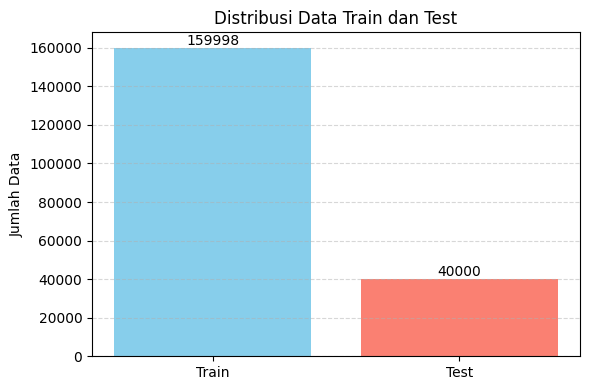

In [25]:
# Hitung jumlah data
train_len = len(y_train)
test_len = len(y_test)

# Label dan jumlah
data_split = [train_len, test_len]
labels = ['Train', 'Test']

# Plot
plt.figure(figsize=(6, 4))
bars = plt.bar(labels, data_split, color=['skyblue', 'salmon'])
plt.title('Distribusi Data Train dan Test')
plt.ylabel('Jumlah Data')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Tambahkan jumlah di atas bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 1, f'{yval}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [26]:
# Reshape data untuk BI-LSTM
X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Label encoding
label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train)
y_test_enc = label_encoder.transform(y_test)

y_train_cat = to_categorical(y_train_enc)
y_test_cat = to_categorical(y_test_enc)

# Cek bentuk data setelah konversi
print(f'Bentuk y_train_cat: {y_train_cat.shape}')
print(f'Bentuk y_test_cat: {y_test_cat.shape}')

Bentuk y_train_cat: (159998, 3)
Bentuk y_test_cat: (40000, 3)


# **Modeling**

# **RNN**

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dropout, Dense

# Model RNN
model_rnn = Sequential([
    SimpleRNN(128, return_sequences=True, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    Dropout(0.3),
    SimpleRNN(64),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(y_train_cat.shape[1], activation='softmax')
])

model_rnn.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 1, 128)         │       221,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 64)             │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,843 (921.26 KB)

 Trainable params: 235,843 (921.26 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
# Compile model
optimizer = Adam(learning_rate=0.001)
model_rnn.compile(
    optimizer= optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [35]:
# Early Stopping
Early_Stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=2,
    restore_best_weights=True,
    mode='max',
    verbose=1
)

In [36]:
# Training model
history = model_rnn.fit(
    X_train_reshaped,
    y_train_cat,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[Early_Stopping],
    verbose=1
)

Epoch 1/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 28s 6ms/step - accuracy: 0.8748 - loss: 0.3505 - val_accuracy: 0.9471 - val_loss: 0.1793
Epoch 2/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 39s 6ms/step - accuracy: 0.9428 - loss: 0.1903 - val_accuracy: 0.9529 - val_loss: 0.1611
Epoch 3/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 39s 5ms/step - accuracy: 0.9501 - loss: 0.1733 - val_accuracy: 0.9551 - val_loss: 0.1553
Epoch 4/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - accuracy: 0.9534 - loss: 0.1663 - val_accuracy: 0.9501 - val_loss: 0.1673
Epoch 5/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.9553 - loss: 0.1592 - val_accuracy: 0.9565 - val_loss: 0.1543
Epoch 6/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.9562 - loss: 0.1574 - val_accuracy: 0.9555 - val_loss: 0.1567
Epoch 7/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 0.9576 - loss: 0.1525 - val_accuracy: 0.9547 - val_loss: 0.1577
Epoch 7: early stopping
Restoring model weights from the end of the best epoch: 5.


In [37]:
# Evaluasi model
test_loss, test_accuracy = model_rnn.evaluate(X_test_reshaped, y_test_cat, verbose=0)
print(f'\nTest accuracy: {test_accuracy:.4f}')


Test accuracy: 0.9563


In [38]:
# Evaluasi model
train_loss, train_accuracy = model_rnn.evaluate(X_train_reshaped, y_train_cat, verbose=0)
test_loss, test_accuracy = model_rnn.evaluate(X_test_reshaped, y_test_cat, verbose=0)

print("Hasil Evaluasi Model:")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")
print(f"Training Loss: {train_loss:.4f}")
print(f"Testing Loss: {test_loss:.4f}")

Hasil Evaluasi Model:
Training Accuracy: 0.9602
Testing Accuracy: 0.9563
Training Loss: 0.1399
Testing Loss: 0.1555


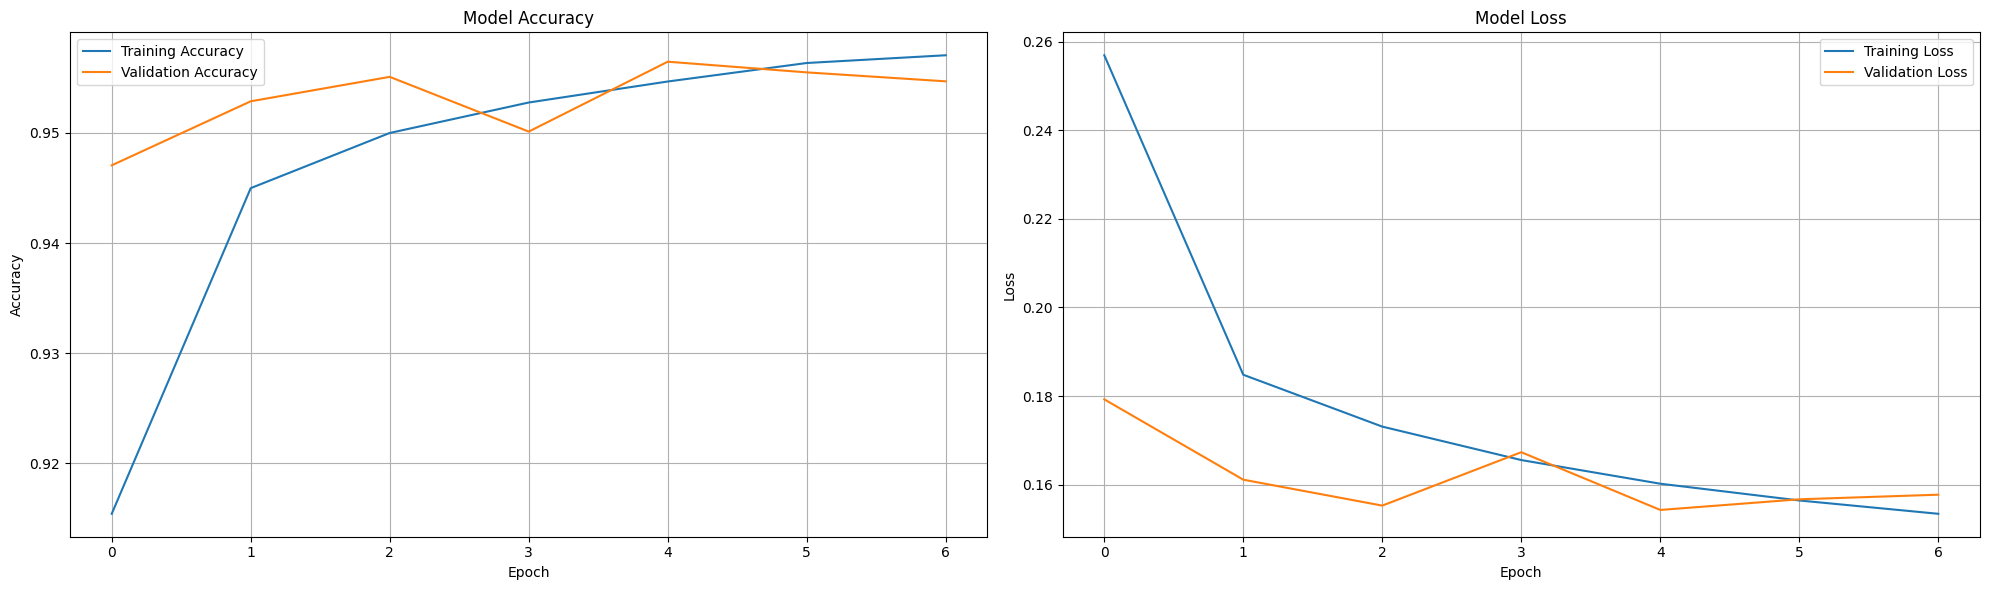

In [39]:
# Buat figure dengan 2 subplot berdampingan
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# Plot Accuracy di subplot pertama
ax1.plot(history.history['accuracy'], label='Training Accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_title('Model Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True)

# Plot Loss di subplot kedua
ax2.plot(history.history['loss'], label='Training Loss')
ax2.plot(history.history['val_loss'], label='Validation Loss')
ax2.set_title('Model Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True)

# Atur jarak antar subplot
plt.tight_layout()

# Tampilkan plot
plt.show()

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


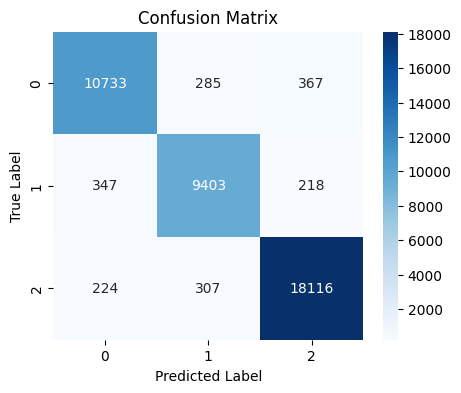

In [40]:
# Prediksi
y_pred = model_rnn.predict(X_test_reshaped)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test_cat, axis=1)

# Confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [41]:
# Classification report
print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes,
                          target_names=['Negative', 'Neutral', 'Positive']))

Classification Report:
              precision    recall  f1-score   support

    Negative       0.95      0.94      0.95     11385
     Neutral       0.94      0.94      0.94      9968
    Positive       0.97      0.97      0.97     18647

    accuracy                           0.96     40000
   macro avg       0.95      0.95      0.95     40000
weighted avg       0.96      0.96      0.96     40000



1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


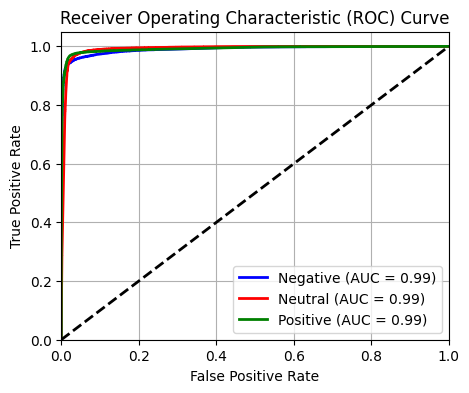


AUC Scores:
Negative: 0.9903
Neutral: 0.9907
Positive: 0.9921


In [43]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Mendapatkan probabilitas prediksi untuk setiap kelas
y_pred_proba = model_rnn.predict(X_test_reshaped)

# Hitung ROC curve dan AUC untuk setiap kelas
n_classes = y_test_cat.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_cat[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(5, 4))
colors = ['blue', 'red', 'green']
labels = ['Negative', 'Neutral', 'Positive']

for i, color, label in zip(range(n_classes), colors, labels):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'{label} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Print AUC scores
print("\nAUC Scores:")
for i, label in enumerate(labels):
    print(f"{label}: {roc_auc[i]:.4f}")

# **LSTM**

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

# Model LSTM
model_lstm = Sequential([
    LSTM(128, return_sequences=True, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    Dropout(0.3),
    LSTM(64),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(y_train_cat.shape[1], activation='softmax')
])

model_lstm.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 1, 128)         │       885,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 936,835 (3.57 MB)

 Trainable params: 936,835 (3.57 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
# Compile model
optimizer = Adam(learning_rate=0.001)
model_lstm.compile(
    optimizer= optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [26]:
# Early Stopping
Early_Stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=2,
    restore_best_weights=True,
    mode='max',
    verbose=1
)

In [27]:
# Training model
history = model_lstm.fit(
    X_train_reshaped,
    y_train_cat,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[Early_Stopping],
    verbose=1
)

Epoch 1/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 78s 18ms/step - accuracy: 0.8604 - loss: 0.3723 - val_accuracy: 0.9448 - val_loss: 0.1813
Epoch 2/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 86s 19ms/step - accuracy: 0.9480 - loss: 0.1756 - val_accuracy: 0.9530 - val_loss: 0.1591
Epoch 3/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 82s 19ms/step - accuracy: 0.9523 - loss: 0.1636 - val_accuracy: 0.9557 - val_loss: 0.1534
Epoch 4/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 76s 18ms/step - accuracy: 0.9560 - loss: 0.1545 - val_accuracy: 0.9544 - val_loss: 0.1598
Epoch 5/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 83s 18ms/step - accuracy: 0.9576 - loss: 0.1495 - val_accuracy: 0.9569 - val_loss: 0.1539
Epoch 6/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 73s 18ms/step - accuracy: 0.9594 - loss: 0.1456 - val_accuracy: 0.9566 - val_loss: 0.1527
Epoch 7/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 85s 19ms/step - accuracy: 0.9608 - loss: 0.1402 - val_accuracy: 0.9586 - val_loss: 0.1496
Epoch 8/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 80s 18ms/step - accuracy: 0.9634 -

In [28]:
# Evaluasi model
test_loss, test_accuracy = model_lstm.evaluate(X_test_reshaped, y_test_cat, verbose=0)
print(f'\nTest accuracy: {test_accuracy:.4f}')


Test accuracy: 0.9578


In [29]:
# Evaluasi model
train_loss, train_accuracy = model_lstm.evaluate(X_train_reshaped, y_train_cat, verbose=0)
test_loss, test_accuracy = model_lstm.evaluate(X_test_reshaped, y_test_cat, verbose=0)

print("Hasil Evaluasi Model:")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")
print(f"Training Loss: {train_loss:.4f}")
print(f"Testing Loss: {test_loss:.4f}")

Hasil Evaluasi Model:
Training Accuracy: 0.9645
Testing Accuracy: 0.9578
Training Loss: 0.1271
Testing Loss: 0.1513


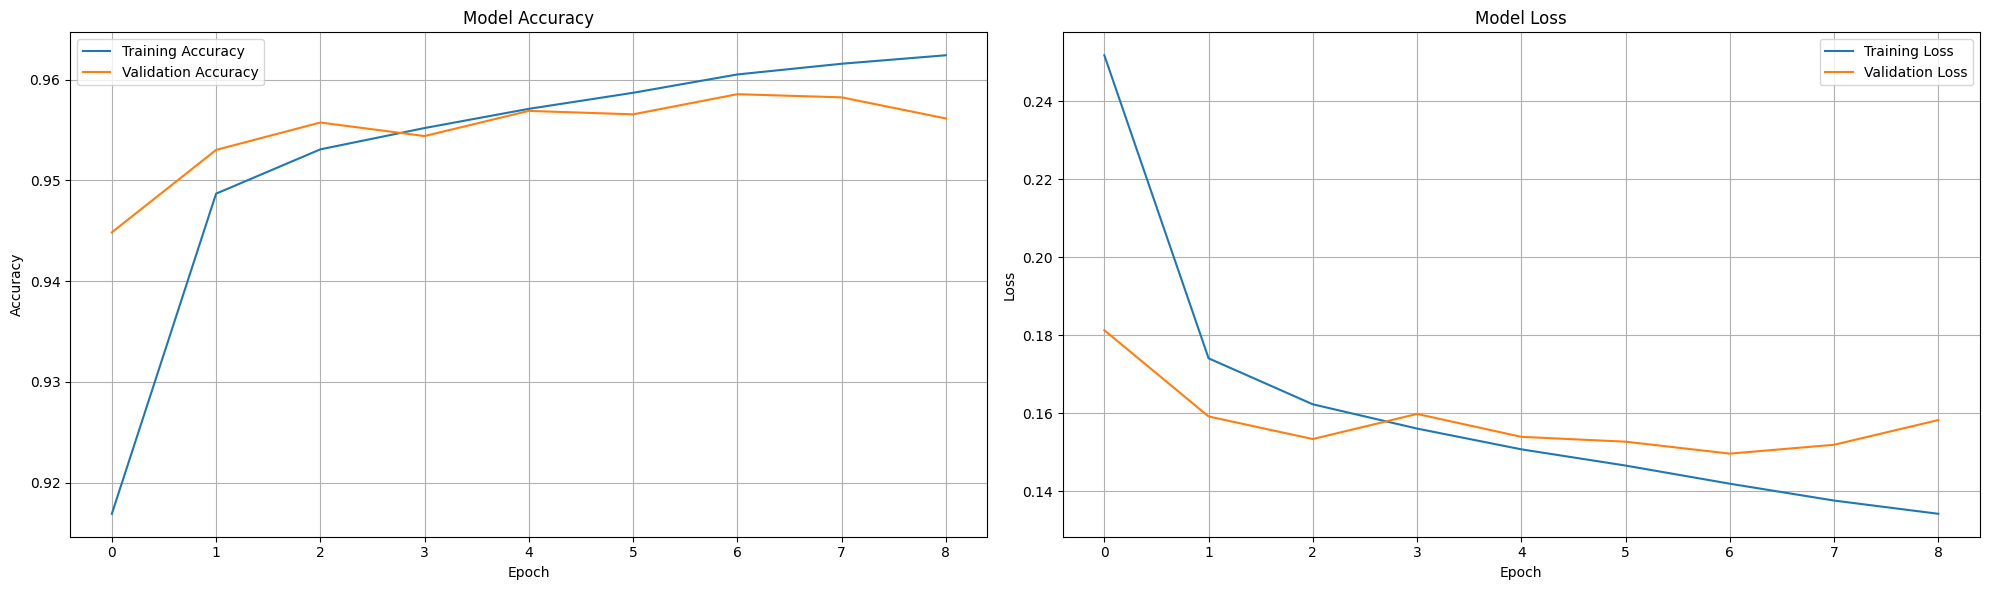

In [30]:
# Buat figure dengan 2 subplot berdampingan
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# Plot Accuracy di subplot pertama
ax1.plot(history.history['accuracy'], label='Training Accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_title('Model Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True)

# Plot Loss di subplot kedua
ax2.plot(history.history['loss'], label='Training Loss')
ax2.plot(history.history['val_loss'], label='Validation Loss')
ax2.set_title('Model Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True)

# Atur jarak antar subplot
plt.tight_layout()

# Tampilkan plot
plt.show()

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step


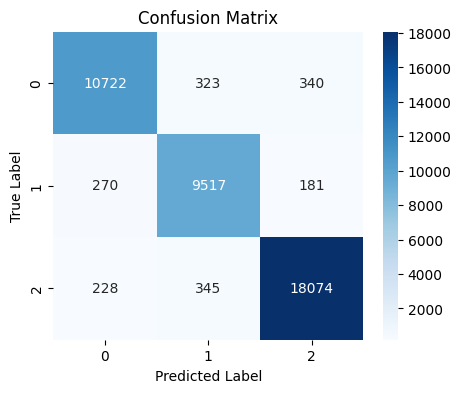

In [31]:
# Prediksi
y_pred = model_lstm.predict(X_test_reshaped)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test_cat, axis=1)

# Confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [32]:
# Classification report
print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes,
                          target_names=['Negative', 'Neutral', 'Positive']))

Classification Report:
              precision    recall  f1-score   support

    Negative       0.96      0.94      0.95     11385
     Neutral       0.93      0.95      0.94      9968
    Positive       0.97      0.97      0.97     18647

    accuracy                           0.96     40000
   macro avg       0.95      0.96      0.95     40000
weighted avg       0.96      0.96      0.96     40000



1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step


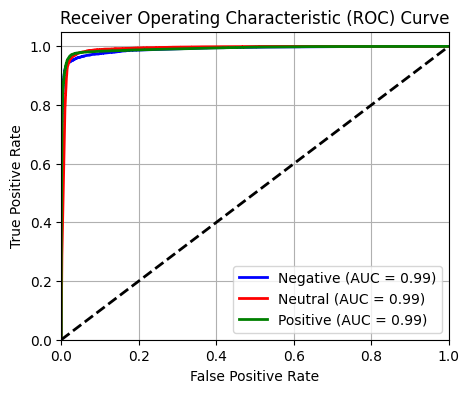


AUC Scores:
Negative: 0.9906
Neutral: 0.9909
Positive: 0.9920


In [34]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Mendapatkan probabilitas prediksi untuk setiap kelas
y_pred_proba = model_lstm.predict(X_test_reshaped)

# Hitung ROC curve dan AUC untuk setiap kelas
n_classes = y_test_cat.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_cat[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(5, 4))
colors = ['blue', 'red', 'green']
labels = ['Negative', 'Neutral', 'Positive']

for i, color, label in zip(range(n_classes), colors, labels):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'{label} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Print AUC scores
print("\nAUC Scores:")
for i, label in enumerate(labels):
    print(f"{label}: {roc_auc[i]:.4f}")

# **Bi-LSTM**

In [27]:
# Model BiLSTM
model_BiLSTM = Sequential([
    Bidirectional(LSTM(128, return_sequences=True),
                 input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    Dropout(0.3),
    Bidirectional(LSTM(64)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(y_train_cat.shape[1], activation='softmax')
])

# Tampilkan ringkasan model
model_BiLSTM.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 1, 256)         │     1,770,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 128)            │       164,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,939,075 (7.40 MB)

 Trainable params: 1,939,075 (7.40 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
# Compile model
optimizer = Adam(learning_rate=0.001)
model_BiLSTM.compile(
    optimizer= optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [29]:
# Early Stopping
Early_Stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=2,
    restore_best_weights=True,
    mode='max',
    verbose=1
)

In [30]:
# Training model
history = model_BiLSTM.fit(
    X_train_reshaped,
    y_train_cat,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[Early_Stopping],
    verbose=1
)

Epoch 1/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 114s 27ms/step - accuracy: 0.8720 - loss: 0.3475 - val_accuracy: 0.9492 - val_loss: 0.1707
Epoch 2/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 137s 26ms/step - accuracy: 0.9490 - loss: 0.1721 - val_accuracy: 0.9497 - val_loss: 0.1687
Epoch 3/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 139s 25ms/step - accuracy: 0.9544 - loss: 0.1597 - val_accuracy: 0.9563 - val_loss: 0.1531
Epoch 4/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 143s 25ms/step - accuracy: 0.9562 - loss: 0.1526 - val_accuracy: 0.9556 - val_loss: 0.1566
Epoch 5/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 101s 25ms/step - accuracy: 0.9579 - loss: 0.1481 - val_accuracy: 0.9569 - val_loss: 0.1525
Epoch 6/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 147s 26ms/step - accuracy: 0.9603 - loss: 0.1399 - val_accuracy: 0.9562 - val_loss: 0.1567
Epoch 7/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 106s 26ms/step - accuracy: 0.9604 - loss: 0.1371 - val_accuracy: 0.9555 - val_loss: 0.1587
Epoch 7: early stopping
Restoring model weights from the end of the b

In [31]:
# Evaluasi model
test_loss, test_accuracy = model_BiLSTM.evaluate(X_test_reshaped, y_test_cat, verbose=0)
print(f'\nTest accuracy: {test_accuracy:.4f}')


Test accuracy: 0.9573


In [32]:
# Evaluasi model
train_loss, train_accuracy = model_BiLSTM.evaluate(X_train_reshaped, y_train_cat, verbose=0)
test_loss, test_accuracy = model_BiLSTM.evaluate(X_test_reshaped, y_test_cat, verbose=0)

print("Hasil Evaluasi Model:")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")
print(f"Training Loss: {train_loss:.4f}")
print(f"Testing Loss: {test_loss:.4f}")

Hasil Evaluasi Model:
Training Accuracy: 0.9619
Testing Accuracy: 0.9573
Training Loss: 0.1327
Testing Loss: 0.1529


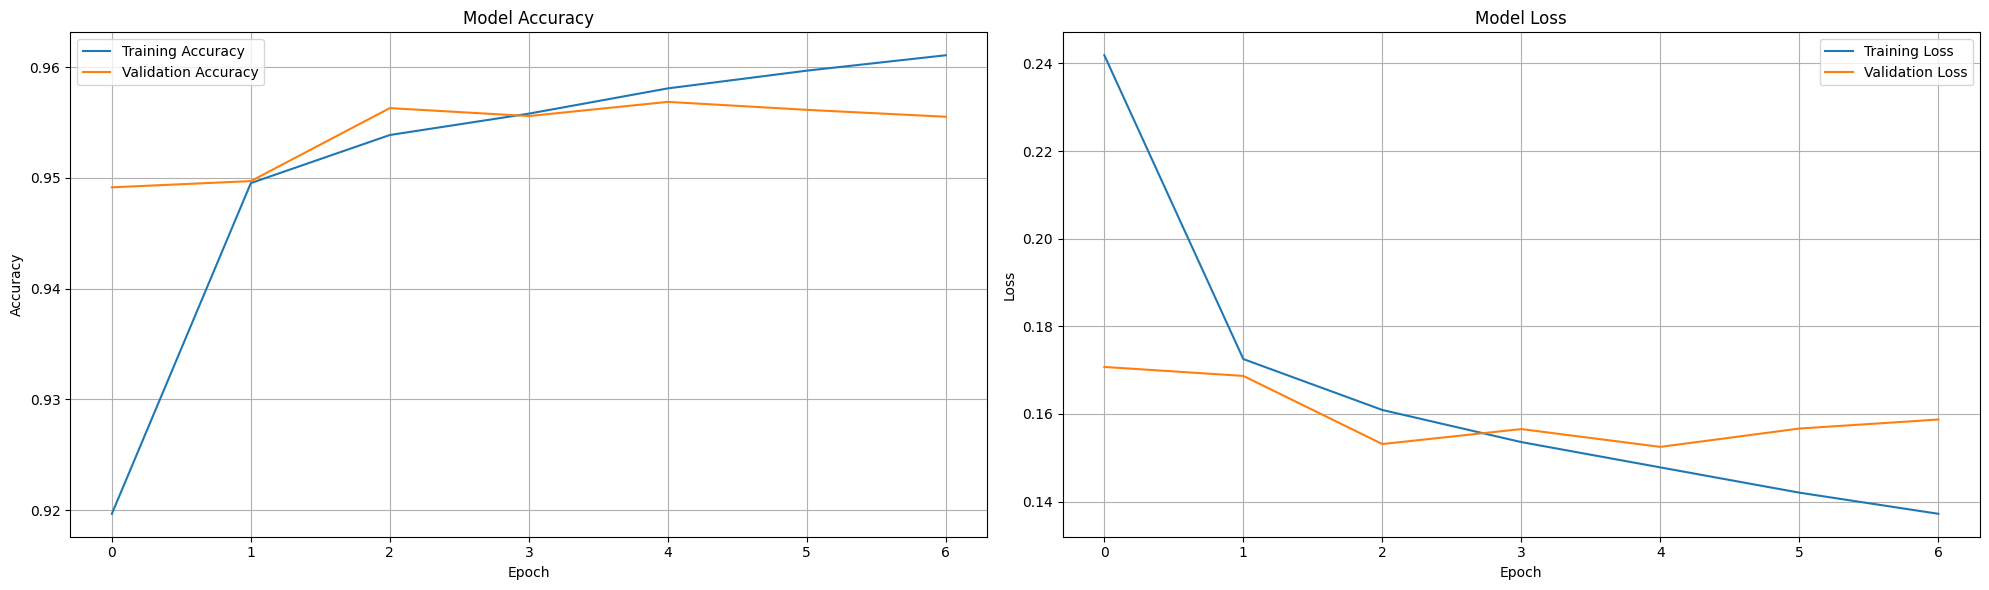

In [33]:
# Buat figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# Plot Accuracy di subplot pertama
ax1.plot(history.history['accuracy'], label='Training Accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_title('Model Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True)

# Plot Loss di subplot kedua
ax2.plot(history.history['loss'], label='Training Loss')
ax2.plot(history.history['val_loss'], label='Validation Loss')
ax2.set_title('Model Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True)

# Atur jarak antar subplot
plt.tight_layout()

# Tampilkan plot
plt.show()

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step


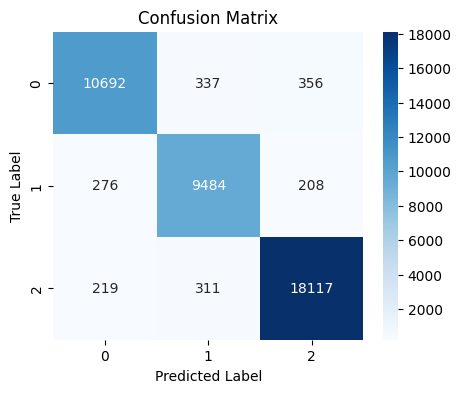

In [34]:
# Prediksi
y_pred = model_BiLSTM.predict(X_test_reshaped)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test_cat, axis=1)

# Confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [35]:
# Classification report
print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes,
                          target_names=['Negative', 'Neutral', 'Positive']))

Classification Report:
              precision    recall  f1-score   support

    Negative       0.96      0.94      0.95     11385
     Neutral       0.94      0.95      0.94      9968
    Positive       0.97      0.97      0.97     18647

    accuracy                           0.96     40000
   macro avg       0.95      0.95      0.95     40000
weighted avg       0.96      0.96      0.96     40000



1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step


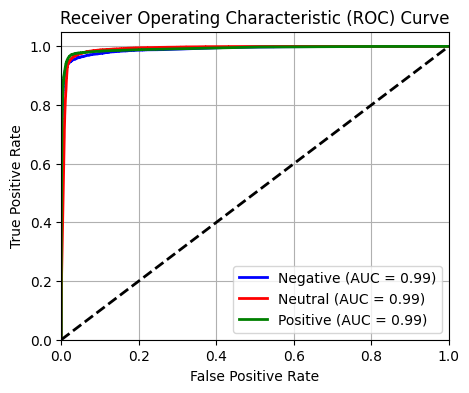


AUC Scores:
Negative: 0.9905
Neutral: 0.9906
Positive: 0.9923


In [36]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Mendapatkan probabilitas prediksi untuk setiap kelas
y_pred_proba = model_BiLSTM.predict(X_test_reshaped)

# Hitung ROC curve dan AUC untuk setiap kelas
n_classes = y_test_cat.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_cat[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(5, 4))
colors = ['blue', 'red', 'green']
labels = ['Negative', 'Neutral', 'Positive']

for i, color, label in zip(range(n_classes), colors, labels):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'{label} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Print AUC scores
print("\nAUC Scores:")
for i, label in enumerate(labels):
    print(f"{label}: {roc_auc[i]:.4f}")

# **Deployment**

# **Visualisasi**

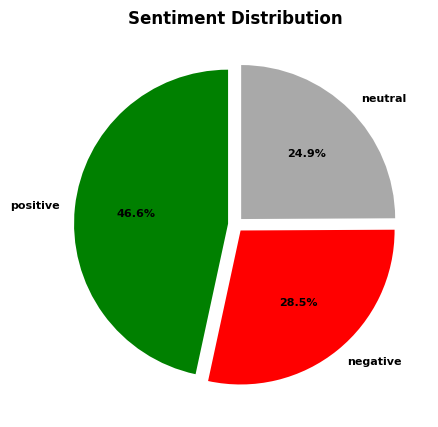

In [14]:
# Data sentiment
sentiment_counts = clean_df['polarity'].value_counts()

# Memberi jarak Chart
explode = [0.05] * len(sentiment_counts)

# Membuat pie chart
plt.figure(figsize=(5, 5))
plt.pie(
    sentiment_counts,
    labels=sentiment_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#008000', '#FF0000', '#A9A9A9'],
    explode=explode,
    textprops={'fontsize': 8, 'weight': 'bold'}
)
plt.title('Sentiment Distribution', fontsize=12, weight='bold')
plt.show()

<Figure size 1200x600 with 0 Axes>

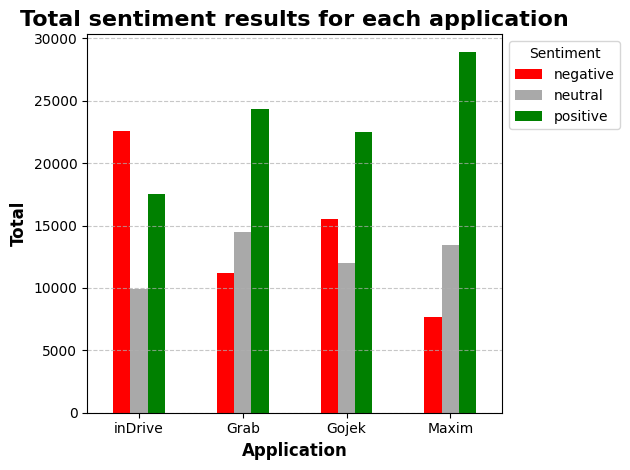

<Figure size 1200x600 with 0 Axes>

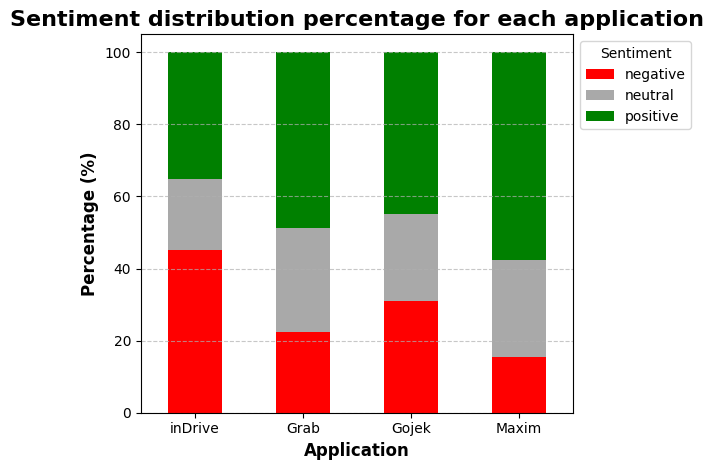

In [15]:
# Data preparation
applications = ['inDrive', 'Grab', 'Gojek', 'Maxim']

# Filter and summarize sentiment counts
summary_data = clean_df.groupby(['appName', 'polarity']).size().unstack(fill_value=0).loc[applications]

# Grafik batang: Jumlah absolut sentimen
plt.figure(figsize=(12, 6))
summary_data.plot(kind='bar', stacked=False, color=['#FF0000', '#A9A9A9', '#008000'])
plt.title('Total sentiment results for each application', fontsize=16, weight='bold')
plt.ylabel('Total', fontsize=12, weight='bold')
plt.xlabel('Application', fontsize=12, weight='bold')
plt.xticks(rotation=0)
plt.legend(title='Sentiment', fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Grafik batang bertumpuk: Persentase distribusi sentimen
summary_percent = (summary_data.T / summary_data.sum(axis=1)).T * 100

plt.figure(figsize=(12, 6))
summary_percent.plot(kind='bar', stacked=True, color=['#FF0000', '#A9A9A9', '#008000'])
plt.title('Sentiment distribution percentage for each application', fontsize=16, weight='bold')
plt.ylabel('Percentage (%)', fontsize=12, weight='bold')
plt.xlabel('Application', fontsize=12, weight='bold')
plt.xticks(rotation=0)
plt.legend(title='Sentiment', fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [16]:
# Tabel ringkasan
summary_data['Total'] = summary_data.sum(axis=1)
summary_percent['Positive (%)'] = summary_percent['positive']
summary_percent['Neutral (%)'] = summary_percent['neutral']
summary_percent['Negative (%)'] = summary_percent['negative']

summary_table = pd.concat([summary_data, summary_percent[['Positive (%)', 'Neutral (%)', 'Negative (%)']]], axis=1)
print(summary_table)

polarity  negative  neutral  positive  Total  Positive (%)  Neutral (%)  \
appName                                                                   
inDrive      22562     9897     17540  49999     35.080702    19.794396   
Grab         11197    14479     24324  50000     48.648000    28.958000   
Gojek        15503    12007     22490  50000     44.980000    24.014000   
Maxim         7664    13458     28877  49999     57.755155    26.916538   

polarity  Negative (%)  
appName                 
inDrive      45.124902  
Grab         22.394000  
Gojek        31.006000  
Maxim        15.328307  


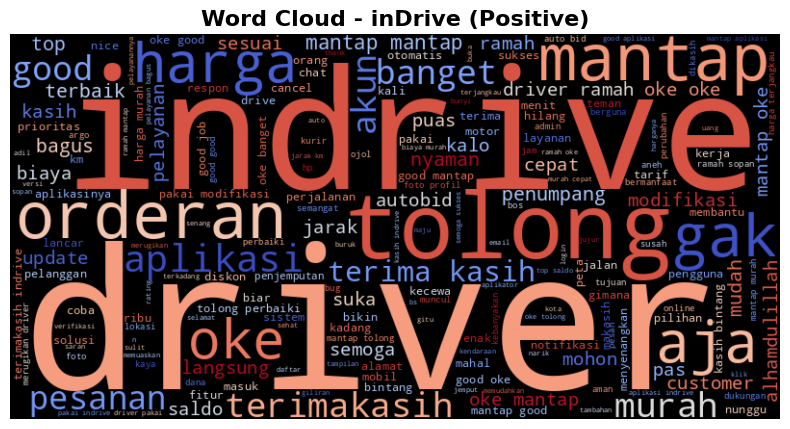

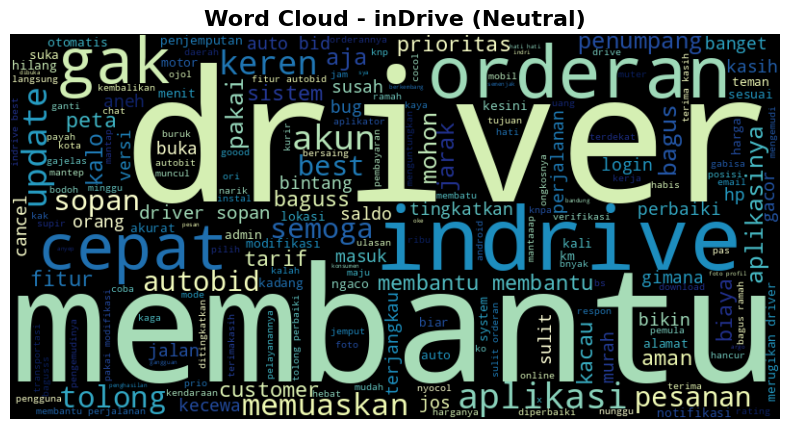

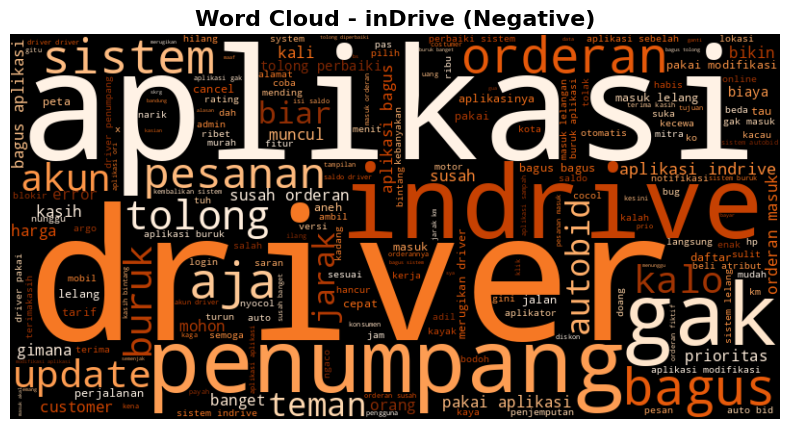

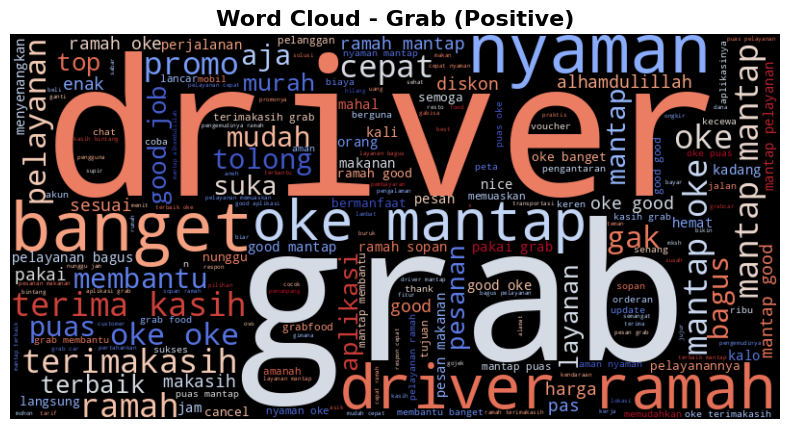

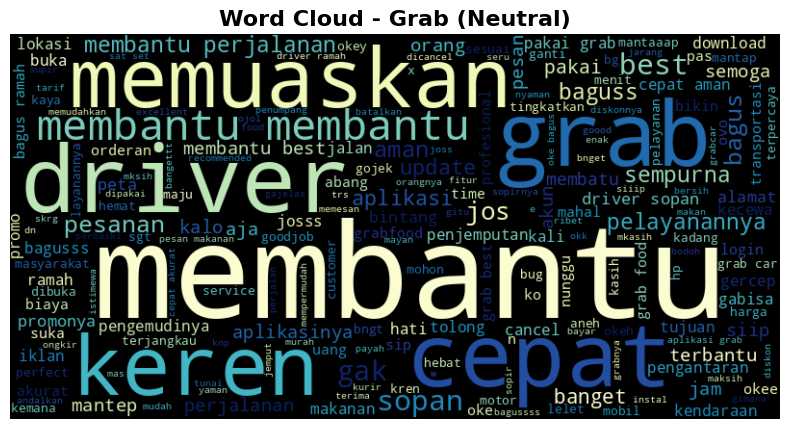

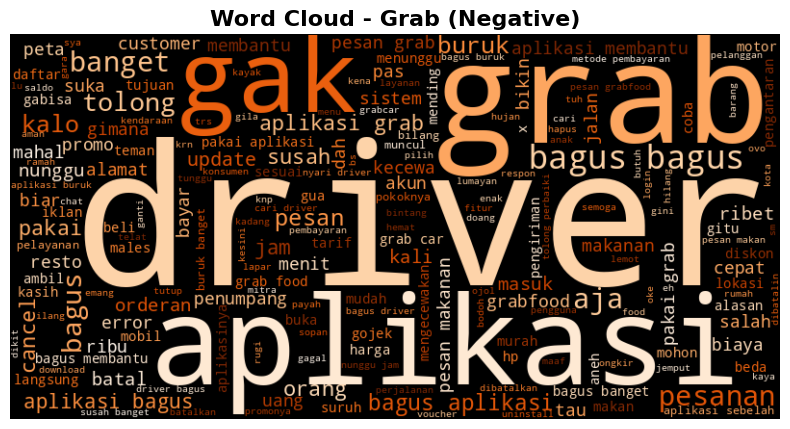

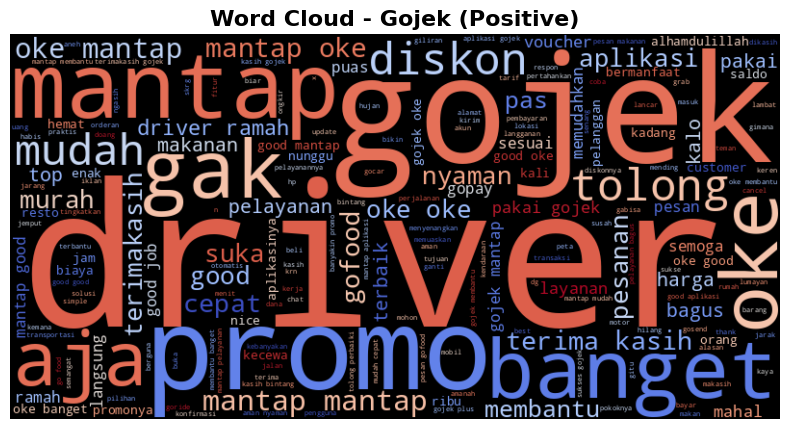

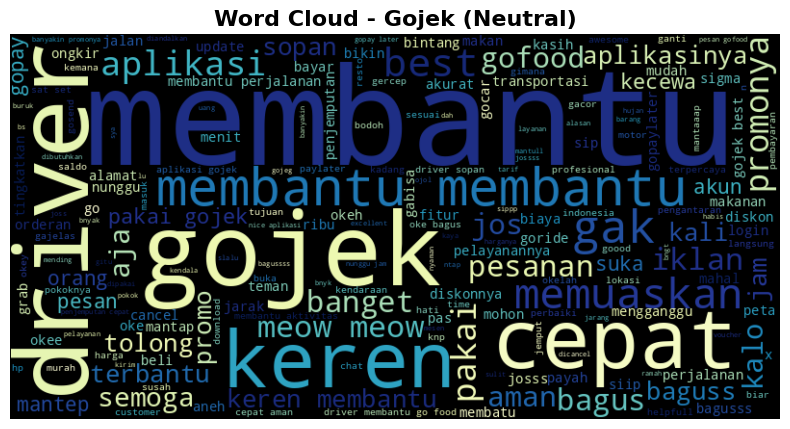

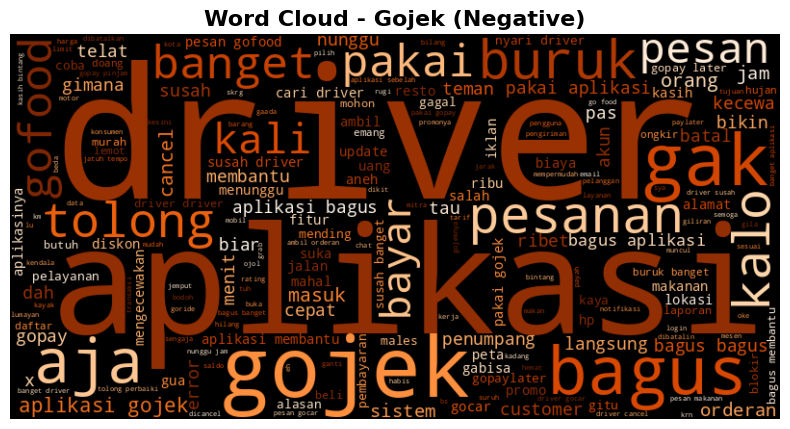

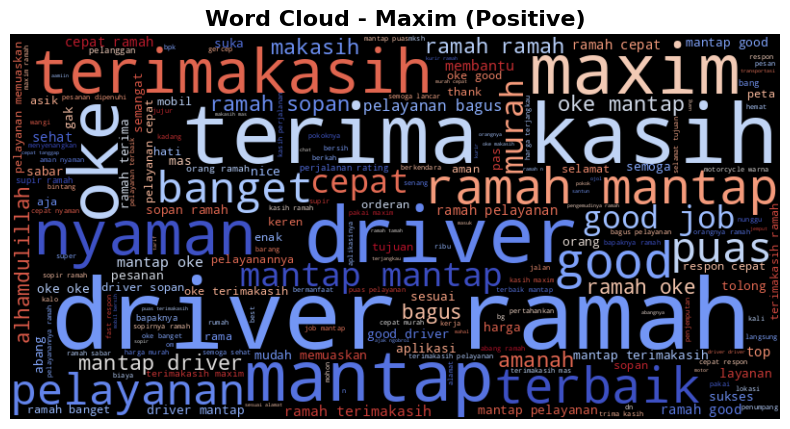

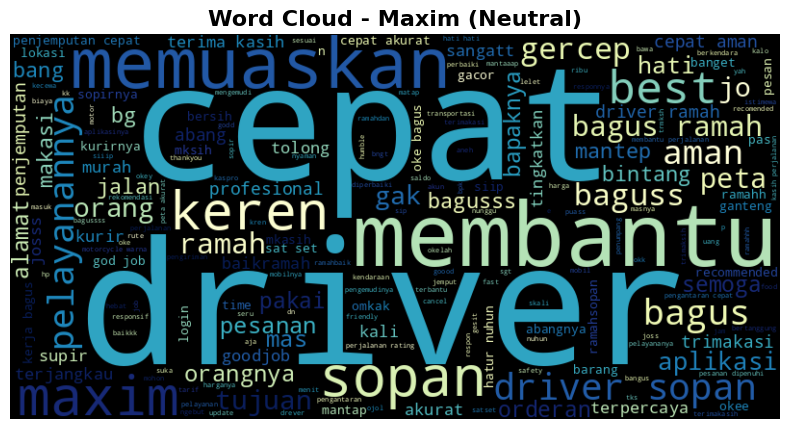

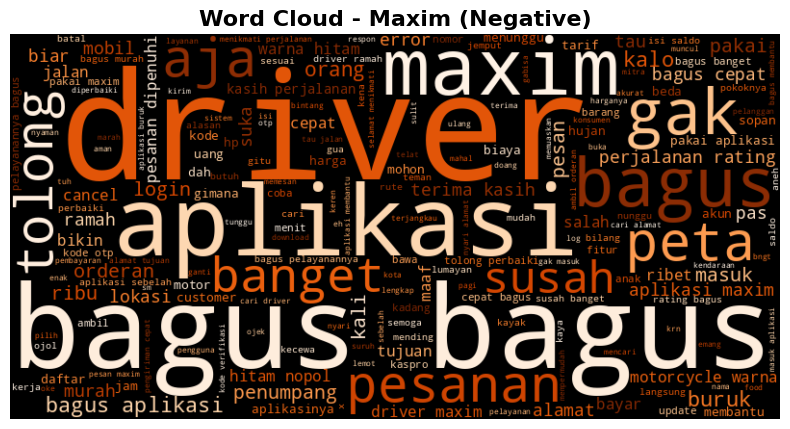

In [17]:
# Visualisasi Word Cloud untuk masing-masing aplikasi dan sentimen
applications = ['inDrive', 'Grab', 'Gojek', 'Maxim']
sentiments = ['positive', 'neutral', 'negative']

for app in applications:
    for sentiment in sentiments:
        # Filter data berdasarkan aplikasi dan sentimen
        app_data = clean_df[(clean_df['appName'] == app) & (clean_df['polarity'] == sentiment)]
        text = ' '.join(app_data['text_final'].astype(str))  # Gabungkan semua teks

        # Buat word cloud
        wordcloud = WordCloud(
            background_color='black',
            colormap='coolwarm' if sentiment == 'positive' else 'YlGnBu' if sentiment == 'neutral' else 'Oranges',
            max_words=200,
            width=800,
            height=400
        ).generate(text)

        # Plot word cloud
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Word Cloud - {app} ({sentiment.capitalize()})', fontsize=16, weight='bold')
        plt.show()